### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creating the data

In [3]:
data = {'Outlook':['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
        'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
        'Humidity':['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
        'Wind':['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
        'Play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

### Converting data to pandas dataframe

In [4]:
data = pd.DataFrame(data)

In [5]:
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [73]:
x_test = np.array(['Sunny', 'Cool', 'High', 'Strong'])

### Dataframe shape

In [6]:
data.shape

(14, 5)

## 1. Exploratory Data Analysis

### 1.1. How many positive and negative points are there ?

In [7]:
pd.DataFrame(data['Play'].value_counts())

,Play
Yes,9
No,5


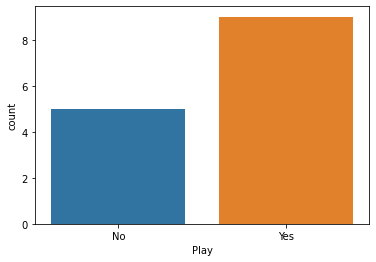

In [8]:
sns.countplot(data['Play'])
plt.show()

### 1.2. Outlook

### `Different categories in outlook`

In [9]:
pd.DataFrame(data['Outlook'].value_counts())

,Outlook
Sunny,5
Rain,5
Overcast,4


### `countplot: outlook`

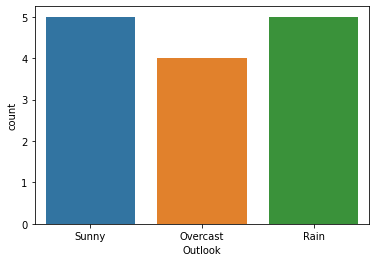

In [10]:
sns.countplot(data['Outlook'])
plt.show()

### 1.3. Temperature

### `Different categories in temperature`

In [11]:
pd.DataFrame(data['Temperature'].value_counts())

,Temperature
Mild,6
Hot,4
Cool,4


### `countplot: temperature`

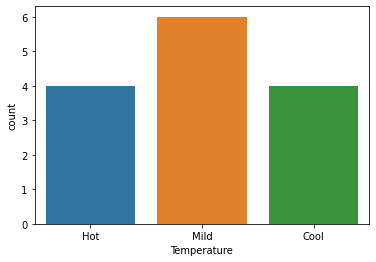

In [12]:
sns.countplot(data['Temperature'])
plt.show()

### 1.4. Humidity

### `categories in humidity`

In [13]:
pd.DataFrame(data['Humidity'].value_counts())

,Humidity
Normal,7
High,7


### `countplot: humidity`

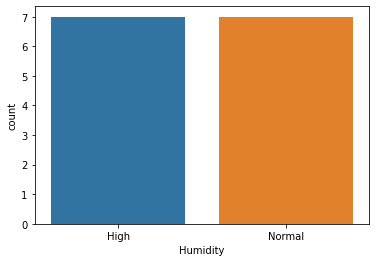

In [14]:
sns.countplot(data['Humidity'])
plt.show()

### 1.5. Wind

### `categories in wind`

In [15]:
pd.DataFrame(data['Wind'].value_counts())

,Wind
Weak,8
Strong,6


### `countplot: wind`

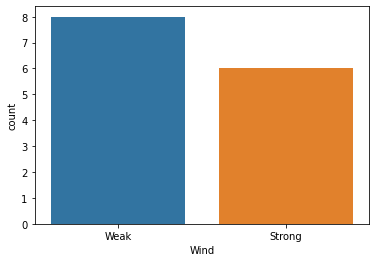

In [16]:
sns.countplot(data['Wind'])
plt.show()

### 1.6. How play is affected with outlook ?

In [17]:
pd.DataFrame(data.groupby(['Outlook'])['Play'].value_counts())

Play
Outlook  Play      
Overcast Yes      4
Rain     Yes      3
         No       2
Sunny    No       3
         Yes      2

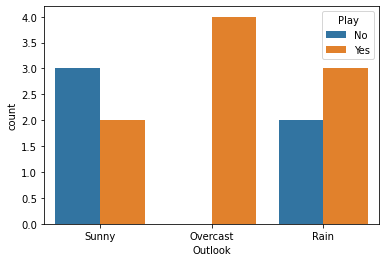

In [18]:
sns.countplot(x='Outlook', hue='Play', data=data)
plt.show()

### 1.7. How play is affected with Temperature ?

In [19]:
pd.DataFrame(data.groupby(['Temperature'])['Play'].value_counts())

Play
Temperature Play      
Cool        Yes      3
            No       1
Hot         No       2
            Yes      2
Mild        Yes      4
            No       2

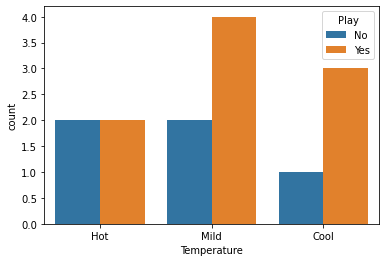

In [20]:
sns.countplot(x='Temperature', hue='Play', data=data)
plt.show()

### 1.8. How play is affected with Humidity ?

In [21]:
pd.DataFrame(data.groupby(['Humidity'])['Play'].value_counts())

Play
Humidity Play      
High     No       4
         Yes      3
Normal   Yes      6
         No       1

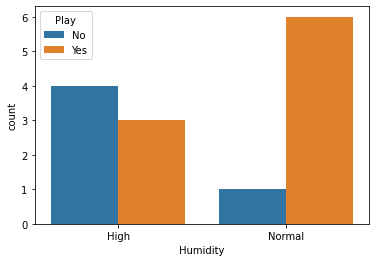

In [22]:
sns.countplot(x='Humidity', hue='Play', data=data)
plt.show()

### 1.9. How play is affected with wind ?

In [23]:
pd.DataFrame(data.groupby(['Wind'])['Play'].value_counts())

Play
Wind   Play      
Strong No       3
       Yes      3
Weak   Yes      6
       No       2

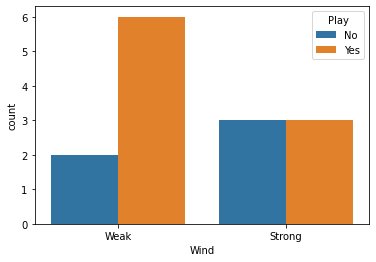

In [24]:
sns.countplot(x='Wind', hue='Play', data=data)
plt.show()

## 2. Feature Engineering

### 2.1. Encoding Outlook

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
enc = OneHotEncoder()

enc.fit(data.Outlook.values.reshape(-1,1))
outlook_ohe_train = enc.transform(data.Outlook.values.reshape(-1,1))
outlook_ohe_test = enc.transform(x_test[0].reshape(-1,1))
#print(enc.get_feature_names())

print(outlook_ohe_train.shape)
print(outlook_ohe_test.shape)

(14, 3)
(1, 3)


### 2.2. Encoding Temperature

In [38]:
enc = OneHotEncoder()

enc.fit(data.Temperature.values.reshape(-1,1))
temperature_ohe_train = enc.transform(data.Temperature.values.reshape(-1,1))
temperature_ohe_test = enc.transform(x_test[1].reshape(-1,1))
#print(enc.get_feature_names())

print(temperature_ohe_train.shape)
print(temperature_ohe_test.shape)

(14, 3)


### 2.3. Encoding Humidity

In [78]:
enc = OneHotEncoder()

enc.fit(data.Humidity.values.reshape(-1,1))
humidity_ohe_train = enc.transform(data.Humidity.values.reshape(-1,1))
humidity_ohe_test = enc.transform(x_test[2].reshape(-1,1))
#print(enc.get_feature_names())

print(humidity_ohe_train.shape)
print(humidity_ohe_test.shape)

(14, 2)
(1, 2)


### 2.4. Encoding Wind

In [79]:
enc = OneHotEncoder()

enc.fit(data.Wind.values.reshape(-1,1))
wind_ohe_train = enc.transform(data.Wind.values.reshape(-1,1))
wind_ohe_test = enc.transform(x_test[3].reshape(-1,1))
#print(enc.get_feature_names())

print(wind_ohe_train.shape)
print(wind_ohe_test.shape)

(14, 2)
(1, 2)


### 2.5. Encoding class label

In [44]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

play_le = le.fit_transform(data.Play)
#play_le = play_le.reshape(-1,1)

print(play_le.shape)

(14,)


### 2.6. concatenating all features

In [80]:
from scipy.sparse import hstack

x_train = hstack((outlook_ohe_train, temperature_ohe_train, humidity_ohe_train, wind_ohe_train))
x_test = hstack((outlook_ohe_test, temperature_ohe_test, humidity_ohe_test, wind_ohe_test))
y_train = play_le

In [81]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(14, 10) (14,)
(1, 10)


## 3. Modelling

In [82]:
from sklearn.naive_bayes import MultinomialNB

### 3.1. Training

In [84]:
mnb = MultinomialNB()

mnb.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 3.2. classification

In [93]:
prediction = mnb.predict(x_test)

def classify(x):
    if(x == 0):
        print('Play Tennis = No')
    else:
        print('Play Tennis = Yes')

In [94]:
classify(prediction)

Play Tennis = No
